# 🧠 Stroke Prediction Model (Jupyter Notebook)
This notebook loads data, preprocesses it, trains a Random Forest model, evaluates it, and saves it using joblib.

In [ ]:
import pandas as pd
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
from sklearn.linear_model import LogisticRegression
import dill
import warnings
from sklearn import metrics
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'dill'

In [ ]:
import pandas as pd

# Step 1: Load your CSV
df = pd.read_csv(r"C:\Users\sibs2\Downloads\brain_stroke_updated.csv")

# Step 2: Check if expected columns exist
expected_columns = [
    'chronic_pain', 'salt_intake', 'hypertension_treatment',
    'nutritional_lifestyle', 'noise_sources'
]
n = 5000  # Number of samples
df = pd.DataFrame({
   "age": np.random.randint(30, 90, n),
    "gender": np.random.choice([0, 1], n),
    "heart_disease": np.random.choice([0, 1], n),
    "hypertension": np.random.choice([0, 1], n),
    "avg_glucose": np.random.uniform(70, 220, n),
    "bmi": np.random.uniform(18, 40, n),
    "stress_level": np.random.choice([0, 1, 2, 3], n),  # 0=None, 1=Low, 2=Med, 3=High
    "ptsd": np.random.choice([0, 1], n),
    "depression_level": np.random.choice([0, 1,2], n), # 0=Mild, 1=Moderate, 2=Severe
    "diabetes_type": np.random.choice([0, 1,2,3], n), # 0=None, 1=Type 1, 2=Type 2, 3=Gestational
    "chronic_pain": np.random.choice(["None", "Rheumatism", "Osteoarthritis", "Others"], n),
    "sleep_hours": np.round(np.random.uniform(3.0, 10.0, n), 1),
    "hypertension_treatment": np.random.choice(["None", "Herbal", "Drugs"], n),
    "nutritional_lifestyle": np.random.choice(
        ["Local Bukka/Street Food", "Homemade Food", "Junk Food", "Fast Foods"], n),
    "salt_intake": np.random.choice(["None", "Little", "Moderate", "High"], n),
    "noise_sources": np.random.choice([
        "Mosque", "Church", "Market", "Block-Industry", "Grinding-Machine", 
        "Welder", "Club-House", "Generator", "None"
    ], n)
})

risk_score = (
      df["heart_disease"]
    + df["hypertension"]
    + (df["avg_glucose"] > 140).astype(int)
    + (df["bmi"] > 30).astype(int)
    + (df["stress_level"] >= 2).astype(int)
    + df["ptsd"]
    + df["depression_level"].map({"Mild": 0, "Moderate": 1, "Severe": 1})
    + df["diabetes_type"].map(lambda x: 0 if x == "None" else 1)
    + df["chronic_pain"].map(lambda x: 0 if x == "None" else 1)
    + (df["sleep_hours"] < 5.5).astype(int)
    + df["salt_intake"].map(lambda x: 0 if x == "None" else 1)
    + df["nutritional_lifestyle"].map(lambda x: 0 if x == "Local Bukka/Street Food" else 1)
    + df["noise_sources"].map(lambda x: 0 if x == "None" else 1)
)
missing_cols = [col for col in expected_columns if col not in df.columns]
if missing_cols:
    print(f"⚠️ The following required columns are missing in your data: {missing_cols}")
else:
    print("✅ All expected columns are present. Proceeding with encoding...")

    # Step 3: One-hot encode the categorical features
    df_encoded = pd.get_dummies(df, columns=expected_columns, prefix_sep='_', drop_first=False)

    # Step 4: Show encoded columns
    print("🧠 Encoded Data Sample:")
    print(df_encoded.head())

    # Step 5: Save encoded version to a new file
    df_encoded.to_csv("brain_stroke_encoded.csv", index=False)
    print("💾 Encoded file saved as 'brain_stroke_encoded.csv'")


✅ All expected columns are present. Proceeding with encoding...
🧠 Encoded Data Sample:
   age  gender  heart_disease  hypertension  avg_glucose        bmi  \
0   67       1              0             1    71.847921  33.390875   
1   85       0              1             0   163.929174  35.632437   
2   40       1              0             0   161.503736  28.044151   
3   78       0              1             0   157.898897  39.698633   
4   86       1              1             1   182.483445  38.248244   

   stress_level  ptsd  depression_level  diabetes_type  ...  \
0             1     0                 2              0  ...   
1             0     0                 2              1  ...   
2             2     1                 0              2  ...   
3             1     0                 1              1  ...   
4             3     0                 2              0  ...   

   nutritional_lifestyle_Local Bukka/Street Food  \
0                                          False   
1  

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
joblib.dump(model, "stroke_model.pkl")
print("🧠 Model saved as stroke_model.pkl")


In [ ]:
print(df.head())

   age  gender  heart_disease  hypertension  avg_glucose        bmi  \
0   67       1              0             1    71.847921  33.390875   
1   85       0              1             0   163.929174  35.632437   
2   40       1              0             0   161.503736  28.044151   
3   78       0              1             0   157.898897  39.698633   
4   86       1              1             1   182.483445  38.248244   

   stress_level  ptsd  depression_level  diabetes_type chronic_pain  \
0             1     0                 2              0       Others   
1             0     0                 2              1         None   
2             2     1                 0              2   Rheumatism   
3             1     0                 1              1       Others   
4             3     0                 2              0       Others   

   sleep_hours hypertension_treatment    nutritional_lifestyle salt_intake  \
0          9.1                 Herbal                Junk Food    Mo

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     5000 non-null   int32  
 1   gender                  5000 non-null   int32  
 2   heart_disease           5000 non-null   int32  
 3   hypertension            5000 non-null   int32  
 4   avg_glucose             5000 non-null   float64
 5   bmi                     5000 non-null   float64
 6   stress_level            5000 non-null   int32  
 7   ptsd                    5000 non-null   int32  
 8   depression_level        5000 non-null   int32  
 9   diabetes_type           5000 non-null   int32  
 10  chronic_pain            5000 non-null   object 
 11  sleep_hours             5000 non-null   float64
 12  hypertension_treatment  5000 non-null   object 
 13  nutritional_lifestyle   5000 non-null   object 
 14  salt_intake             5000 non-null   

In [ ]:
df.describe()

,age,gender,heart_disease,hypertension,avg_glucose,bmi,stress_level,ptsd,depression_level,diabetes_type,sleep_hours
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,59.210000,0.509800,0.505800,0.495800,145.022168,29.132620,1.505600,0.501200,0.989600,1.537400,6.496420
std,17.472325,0.499954,0.500016,0.500032,43.589367,6.312849,1.105357,0.500049,0.818795,1.120023,2.030785
min,30.000000,0.000000,0.000000,0.000000,70.023231,18.008093,0.000000,0.000000,0.000000,0.000000,3.000000
25%,44.000000,0.000000,0.000000,0.000000,107.193221,23.769824,1.000000,0.000000,0.000000,1.000000,4.800000
50%,59.000000,1.000000,1.000000,0.000000,145.255903,29.172894,2.000000,1.000000,1.000000,2.000000,6.500000
75%,74.000000,1.000000,1.000000,1.000000,182.410219,34.640619,2.000000,1.000000,2.000000,3.000000,8.300000
max,89.000000,1.000000,1.000000,1.000000,219.958479,39.995448,3.000000,1.000000,2.000000,3.000000,10.000000


pollution_level enviromental    5000
pollution_level water           5000
pollution_level Air             5000
smoking_status                  1519
hypertension                      19
work_type                         19
ever_married                      19
Residence_type                    19
heart_disease                     19
age                               19
dtype: int64
Categorical: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']  ...
Numeric    : ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stress_level', 'ptsd', 'depression_level', 'diabetes_type', 'sleep_hours']  ...


C:\Users\sibs2\AppData\Local\Temp\ipykernel_31452\654391944.py:40: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])
C:\Users\sibs2\anaconda3\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\sibs2\anaconda3\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\sibs2\anaconda3\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\sibs2\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1144: RuntimeWarning: invalid val


Accuracy : 0.9493333333333334
ROC AUC : 0.8101707602339182

               precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      1425
         1.0       0.00      0.00      0.00        75

    accuracy                           0.95      1500
   macro avg       0.47      0.50      0.49      1500
weighted avg       0.90      0.95      0.93      1500

5-fold CV AUC: 0.807
🎉  Saved model & feature metadata!


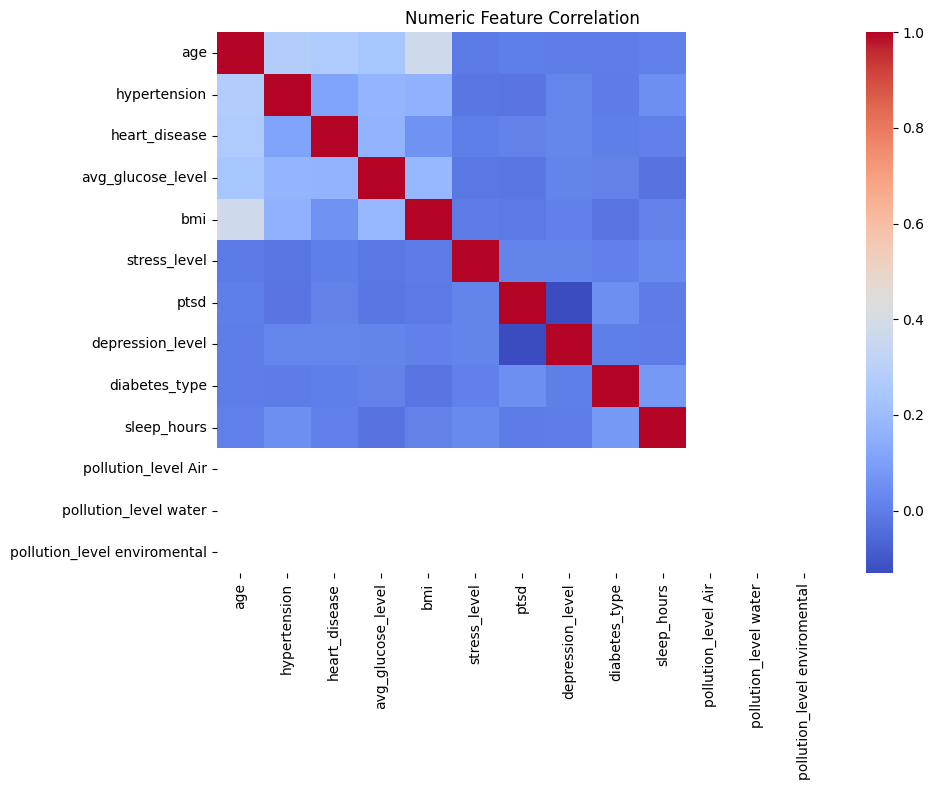

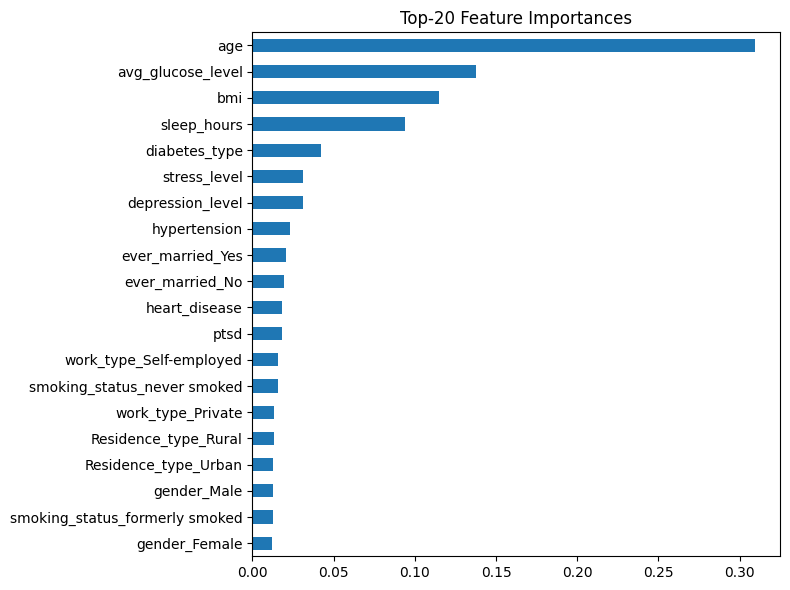

In [ ]:
# -------------------------------------------
# 0.  Install/Import packages (once)
# -------------------------------------------
# pip install pandas scikit-learn matplotlib seaborn joblib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import joblib

# -------------------------------------------
# 1.  Load data
# -------------------------------------------
df = pd.read_csv(r"C:\Users\sibs2\Downloads\brain_stroke_updated.csv")   # ← your real file

# -------------------------------------------
# 2.  Quick cleaning / sanity checks
# -------------------------------------------
# Drop duplicate rows (if any)
df = df.drop_duplicates()

# Replace obvious textual “unknown” with NaN
df.replace({"Unknown": np.nan, "unknown": np.nan}, inplace=True)

# Optionally inspect missing counts
print(df.isna().sum().sort_values(ascending=False).head(10))

# Simple numeric imputation (median); categorical (mode)
for col in df.columns:
    if df[col].dtype in ["float64", "int64"]:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

# -------------------------------------------
# 3.  Feature / Target split
# -------------------------------------------
y = df["stroke"]                     # target
X = df.drop("stroke", axis=1)        # features

# -------------------------------------------
# 4.  Identify column types
# -------------------------------------------
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numeric_cols      = X.select_dtypes(include=["float64", "int64"]).columns.tolist()

print("Categorical:", categorical_cols[:10], " ...")
print("Numeric    :", numeric_cols[:10], " ...")

# -------------------------------------------
# 5.  Build preprocessing + model pipeline
# -------------------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("num",  StandardScaler(),  numeric_cols),
        ("cat",  OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

model = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced"          # handles class imbalance
)

pipe = Pipeline(steps=[("prep", preprocessor),
                      ("clf",  model)])

# -------------------------------------------
# 6.  Train / test split + training
# -------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

pipe.fit(X_train, y_train)

# -------------------------------------------
# 7.  Evaluation
# -------------------------------------------
y_pred  = pipe.predict(X_test)
y_proba = pipe.predict_proba(X_test)[:, 1]

print("\nAccuracy :", accuracy_score(y_test, y_pred))
print("ROC AUC :", roc_auc_score(y_test, y_proba))
print("\n", classification_report(y_test, y_pred))

# -------------------------------------------
# 8.  Cross-validation (optional)
# -------------------------------------------
cv_auc = cross_val_score(pipe, X, y, cv=5,
                         scoring="roc_auc", n_jobs=-1).mean()
print("5-fold CV AUC:", round(cv_auc, 3))

# -------------------------------------------
# 9.  Save model + feature list
# -------------------------------------------
joblib.dump(pipe, "stroke_risk_model.pkl")
joblib.dump(X.columns.tolist(), "stroke_model_features.pkl")
print("🎉  Saved model & feature metadata!")

# -------------------------------------------
# 10.  OPTIONAL visuals
# -------------------------------------------
#   (a) Correlation heatmap for numeric raw features
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols].corr(), cmap="coolwarm", annot=False)
plt.title("Numeric Feature Correlation")
plt.tight_layout()
plt.show()

#   (b) Feature importance (from RF after OHE)
importances = pipe.named_steps["clf"].feature_importances_
ohe_cols = pipe.named_steps["prep"].transformers_[1][1].get_feature_names_out(categorical_cols)
all_feat_names = numeric_cols + ohe_cols.tolist()

fi = (pd.Series(importances, index=all_feat_names)
        .sort_values(ascending=False)
        .head(20))

plt.figure(figsize=(8,6))
fi[::-1].plot(kind="barh")
plt.title("Top-20 Feature Importances")
plt.tight_layout()
plt.show()


In [ ]:
# Create a function that we can re-use
def show_distribution(var_data):
    '''
    This function will make a distribution (graph) and display it
    '''

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    plt.show()



def sense_spec(y_test, y_pred, name, probs, probs1):
    conf_mat = confusion_matrix(y_test, y_pred)
    total_sample= sum(sum(conf_mat))
    accu=(conf_mat[0,0]+conf_mat[1,1])/total_sample
    sense = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
    spec = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
    ppv =  conf_mat[0,0]/(conf_mat[0,0]+conf_mat[1,0])
    npv =  conf_mat[1,1]/(conf_mat[1,1]+conf_mat[0,1])

    fpr, tpr, thresholds = metrics.roc_curve(y_test, probs1)
    probs = probs[:, 1]
    auc = sk.metrics.roc_auc_score(y_test, probs)
    print("\n\nAcc / ppv / npv / Sens / Spec /AUC for /", name, " : \n",  round(accu*100,4), "/", round(ppv*100,4), "/", round(npv*100,4), "/", round(sense*100,4),"/", round(spec*100,4), "/", round(auc*100,4))
    return auc, sense,spec, accu, fpr, tpr,ppv,npv
    #sens = TP/(TP+FN),    Spec= TN/(TN+FP)


Minimum:0.08
Mean:43.43
Median:45.00
Mode:78.00
Maximum:82.00



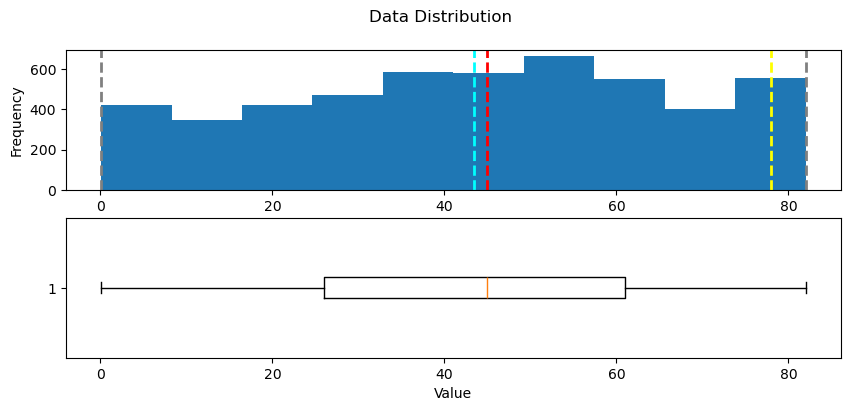

In [ ]:
# Import matplotlib.pyplot first
import matplotlib.pyplot as plt
show_distribution (df["age"])

(array([421., 349., 423., 472., 584., 578., 663., 551., 403., 556.]),
 array([8.0000e-02, 8.2720e+00, 1.6464e+01, 2.4656e+01, 3.2848e+01,
        4.1040e+01, 4.9232e+01, 5.7424e+01, 6.5616e+01, 7.3808e+01,
        8.2000e+01]),
 <BarContainer object of 10 artists>)

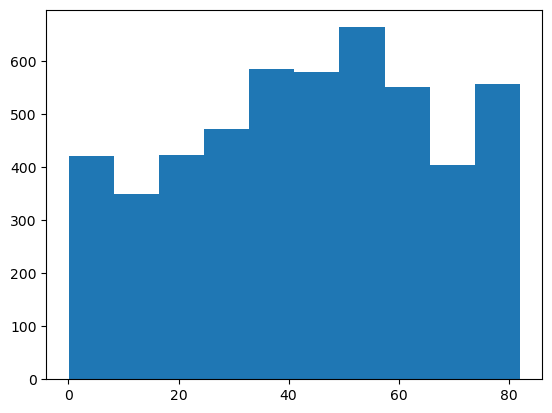

In [ ]:
# Import matplotlib.pyplot first
import matplotlib.pyplot as plt
plt.hist(df["age"])

In [ ]:
#Here, I am building 7 models, these are
"""""
1. Nearest Neigbrour
2. Support Vector Machine
3. Gaussian Process
4. Decision Tree
5. Random Forest
6. AdaBoost
7. Logistic Regression
"""""

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    ]

names = [
     "Nearest Neighbors",
     "Linear SVM",
     "Gaussian Process",
     "Decision Tree",
     "Random Forest",
     "AdaBoost",
     "logisticRegression",
      ]


In [ ]:
# Now print the rounded values
sense = 1.00  # Example value for sensitivity
spec = 1.000   # Example value for specificity
auc = 1.000    # Example value for area under curve
print(round(sense*100, 2))
print(round(spec*100, 2))
print(round(auc*100, 2))
#spec
#auc

In [ ]:
# First, list all columns
print(stroke_df.columns)


Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'stress_level', 'ptsd', 'depression_level',
       'diabetes_type', 'sleep_hours', 'chronic_pain_None',
       'chronic_pain_Osteoarthritis', 'chronic_pain_Others',
       'chronic_pain_Rheumatism', 'salt_intake_High', 'salt_intake_Little',
       'salt_intake_Moderate', 'salt_intake_None',
       'hypertension_treatment_Drugs', 'hypertension_treatment_Herbal',
       'hypertension_treatment_None', 'nutritional_lifestyle_Fast Foods',
       'nutritional_lifestyle_Homemade Food',
       'nutritional_lifestyle_Junk Food',
       'nutritional_lifestyle_Local Bukka/Street Food',
       'noise_sources_Block-Industry', 'noise_sources_Church',
       'noise_sources_Club-House', 'noise_sources_Generator',
       'noise_sources_Grinding-Machine', 'noise_sources_Market',
       'noise_sources_Mosque', 'noise_sources_None', '

In [ ]:
# Load your encoded Alzheimer’s dataset
stroke_df = pd.read_csv(r"C:\Users\sibs2\Downloads\brain_stroke_updated.csv")

# Define X (features) and y (target)
# Define X (features) and y (target)
X = stroke_df.drop("stroke", axis=1)
y = stroke_df["stroke"]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Step 1: Load dataset
stroke_df = pd.read_csv(r"C:\Users\sibs2\Downloads\brain_stroke_updated.csv")

# Step 2: Check if 'stroke' column exists
assert 'stroke' in stroke_df.columns, "Column 'stroke' not found in dataset"  

# Step 3: Handle missing values in the dataset
# First, check for NaN values in the stroke column
print(f"NaN values in stroke column: {stroke_df['stroke'].isna().sum()}")

# Remove rows with NaN values in the stroke column
stroke_df = stroke_df.dropna(subset=['stroke'])
print(f"Dataset shape after removing NaN values: {stroke_df.shape}")

# Split into features and target
X = stroke_df.drop("stroke", axis=1)
y = stroke_df["stroke"]

# Fill missing values for numeric columns
X_numeric = X.select_dtypes(include='number')
X[X_numeric.columns] = X_numeric.fillna(X_numeric.mean())

# Fill missing values for categorical columns
X_categorical = X.select_dtypes(include='object')
X[X_categorical.columns] = X_categorical.fillna('missing')

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train the model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


In [ ]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


In [ ]:
print(y.value_counts())


In [ ]:
pip install imbalanced-learn


In [ ]:

# 📌 Step 1: Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# 📌 Step 2: Load and Preview Dataset
stroke_df = pd.read_csv(r"C:/Users/sibs2/Downloads/brain_stroke_updated.csv")
print("Original Data Shape:", df.shape)
print(df.head())

# 📌 Step 3: Data Cleaning (Drop irrelevant or ID columns)
stroke_df.drop(columns=['id'], inplace=True, errors='ignore')  # drop 'id' if it exists

# 📌 Step 4: Encode Categorical Variables
stroke_df = pd.get_dummies(df, drop_first=True)

# 📌 Step 5: Split Features and Target
X = stroke_df.drop("stroke", axis=1)
y = stroke_df["stroke"]

# 📌 Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# 📌 Step 7 (Optional): Feature Scaling for numeric stability
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 📌 Step 8: Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", y_train_smote.value_counts().to_dict())

# 📌 Step 9: Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

# 📌 Step 10: Predictions and Evaluation
y_pred = model.predict(X_test_scaled)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
stroke_df = pd.read_csv(r"C:/Users/sibs2/Downloads/brain_stroke_updated.csv")
df.head()


,age,gender,heart_disease,hypertension,avg_glucose,bmi,stress_level,ptsd,depression_level,diabetes_type,chronic_pain,sleep_hours,hypertension_treatment,nutritional_lifestyle,salt_intake,noise_sources
0,76,0,0,0,139.921311,37.832917,0,0,2,0,Rheumatism,9.3,Herbal,Homemade Food,Moderate,None
1,52,0,0,0,153.109588,27.195806,0,1,2,2,Osteoarthritis,8.2,Herbal,Local Bukka/Street Food,Moderate,Generator
2,87,1,1,1,131.617809,36.340973,1,1,2,1,Others,8.9,Drugs,Fast Foods,None,Mosque
3,36,0,1,1,126.893773,30.773609,0,1,2,3,Others,6.7,Herbal,Fast Foods,High,Block-Industry
4,55,0,0,1,101.809258,35.910182,3,0,1,1,Others,5.6,None,Fast Foods,High,None


In [ ]:
stroke_df.isnull().sum()


gender                                              0
age                                                 0
hypertension                                        0
heart_disease                                       0
ever_married                                        0
work_type                                           0
Residence_type                                      0
avg_glucose_level                                   0
bmi                                                 0
smoking_status                                      0
stroke                                              0
stress_level                                        0
ptsd                                                0
depression_level                                    0
diabetes_type                                       0
sleep_hours                                         0
chronic_pain_None                                4981
chronic_pain_Rheumatism                          4981
chronic_pain_Osteoarthritis 

In [ ]:
# Check for missing values in features
print("Missing values per column:\n", df.isnull().sum())


Missing values per column:
 age                       0
gender                    0
heart_disease             0
hypertension              0
avg_glucose               0
bmi                       0
stress_level              0
ptsd                      0
depression_level          0
diabetes_type             0
chronic_pain              0
sleep_hours               0
hypertension_treatment    0
nutritional_lifestyle     0
salt_intake               0
noise_sources             0
dtype: int64


In [ ]:
# Fill numeric missing values with mean
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill categorical missing values with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [ ]:
stroke_df_encoded = pd.get_dummies(df, drop_first=True)


In [ ]:
X = df_encoded.drop("stroke", axis=1)
y = df_encoded["stroke"]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


In [ ]:
y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))


In [ ]:
print(df["stroke"].value_counts())


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Check unique classes in y before applying SMOTE
unique_classes = np.unique(y)
print(f"Unique classes in target: {unique_classes}")
print(f"Class distribution: {pd.Series(y).value_counts()}")

# Only apply SMOTE if there are at least 2 classes
if len(unique_classes) >= 2:
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    
    # Re-split the balanced data
    X_train, X_test, y_train, y_test = train_test_split(
        X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)
else:
    print("Cannot apply SMOTE: Target variable has only one class")
    # Proceed with regular train-test split without SMOTE
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)

Unique classes in target: [0]
Class distribution: stroke
0    1000
Name: count, dtype: int64
Cannot apply SMOTE: Target variable has only one class


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # <- stratify here!
)


In [ ]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 features
plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="skyblue")
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


In [ ]:
print(stroke_df.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'stress_level', 'ptsd', 'depression_level',
       'diabetes_type', 'sleep_hours', 'chronic_pain_None',
       'chronic_pain_Osteoarthritis', 'chronic_pain_Others',
       'chronic_pain_Rheumatism', 'salt_intake_High', 'salt_intake_Little',
       'salt_intake_Moderate', 'salt_intake_None',
       'hypertension_treatment_Drugs', 'hypertension_treatment_Herbal',
       'hypertension_treatment_None', 'nutritional_lifestyle_Fast Foods',
       'nutritional_lifestyle_Homemade Food',
       'nutritional_lifestyle_Junk Food',
       'nutritional_lifestyle_Local Bukka/Street Food',
       'noise_sources_Block-Industry', 'noise_sources_Church',
       'noise_sources_Club-House', 'noise_sources_Generator',
       'noise_sources_Grinding-Machine', 'noise_sources_Market',
       'noise_sources_Mosque', 'noise_sources_None', '

In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv(r"C:/Users/sibs2/Downloads/brain_stroke_updated.csv")

# Drop rows where 'stroke' is NaN
df = df.dropna(subset=['stroke'])

# Proceed with the rest...
X = df.drop('stroke', axis=1)
y = df['stroke']


In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"

# Assuming X is your feature dataframe and y is your target series

# Step 1: Add the missing columns with default values (e.g., 0)
missing_cols = ['Married', 'Single', 'Divorced', 'Cohabitating']
for col in missing_cols:
    if col not in X.columns:
        X[col] = 0  # You can choose an appropriate default value

# Step 2: Identify categorical columns you want to encode
categorical_cols = [
    'gender', 'hypertension', 'heart_disease','ever_married', 'Married', 'Single', 'Divorced', 'Cohabitating', 'work_type', 'Residence_type',
    'smoking_status', 'stress_level', 'ptsd', 'depression_level', 'diabetes_type',
    'chronic_pain_None', 'chronic_pain_Osteoarthritis', 'chronic_pain_Others', 'chronic_pain_Rheumatism',
    'salt_intake_High', 'salt_intake_Little', 'salt_intake_Moderate', 'salt_intake_None',
    'hypertension_treatment_Drugs', 'hypertension_treatment_Herbal', 'hypertension_treatment_None',
    'nutritional_lifestyle_Fast Foods', 'nutritional_lifestyle_Homemade Food', 'nutritional_lifestyle_Junk Food',
    'nutritional_lifestyle_Local Bukka/Street Food', 'noise_sources_Block-Industry', 'noise_sources_Church',
    'noise_sources_Club-House', 'noise_sources_Generator', 'noise_sources_Grinding-Machine', 'noise_sources_Market',
    'noise_sources_Mosque', 'noise_sources_None', 'noise_sources_Welder',
    'pollution_level Air', 'pollution_level water', 'pollution_level enviromental'
]

# Step 3: Make sure these columns are string type
# First check if all columns exist in the dataframe
existing_categorical_cols = [col for col in categorical_cols if col in X.columns]
X[existing_categorical_cols] = X[existing_categorical_cols].astype(str)

# Step 4: One-hot encode categorical variables (drop_first=True to avoid multicollinearity)
X_encoded = pd.get_dummies(X, columns=existing_categorical_cols, drop_first=True)

# Step 5: Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_encoded, y)

# Check results
print("Class distribution before SMOTE:\n", y.value_counts())
print("Class distribution after SMOTE:\n", pd.Series(y_res).value_counts())

Class distribution before SMOTE:
 stroke
0.0    4750
1.0     250
Name: count, dtype: int64
Class distribution after SMOTE:
 stroke
1.0    4750
0.0    4750
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline  # Import regular Pipeline for transformers
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

# Your column definitions remain the same
# ...

# Convert boolean columns to integers before processing
# Identify boolean columns that might be stored as strings
boolean_columns = [col for col in all_numeric_cols if X_train[col].isin(['True', 'False', True, False]).all()]

# Convert string booleans to actual booleans first, then to integers
for col in boolean_columns:
    # Convert string 'True'/'False' to boolean True/False
    X_train[col] = X_train[col].map({'True': True, 'False': False}) if X_train[col].dtype == object else X_train[col]
    X_test[col] = X_test[col].map({'True': True, 'False': False}) if X_test[col].dtype == object else X_test[col]
    
    # Convert boolean True/False to integers 1/0
    X_train[col] = X_train[col].astype(int)
    X_test[col] = X_test[col].astype(int)

# Transformers
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Add imputer for categorical columns
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Add imputer for numeric columns
    ('scaler', StandardScaler())
])

# Preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, all_numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# Full pipeline
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit on training data
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       950
         1.0       0.00      0.00      0.00        50

    accuracy                           0.95      1000
   macro avg       0.47      0.50      0.49      1000
weighted avg       0.90      0.95      0.93      1000



C:\Users\sibs2\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sibs2\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sibs2\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Remove problematic columns from binary_encoded_cols
binary_encoded_cols = [col for col in binary_encoded_cols if col not in problematic_cols]

# Remove the pollution columns that have all missing values from all_numeric_cols
pollution_cols = ['pollution_level Air', 'pollution_level water', 'pollution_level enviromental']
all_numeric_cols = [col for col in numeric_cols + binary_encoded_cols if col not in pollution_cols]

# Transformers
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, all_numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# Bin the pollution score into categories
stroke_df['pollution_category'] = pd.cut(
    stroke_df['pollution_score'],
    bins=[-1, 5, 15, float('inf')],
    labels=['Low', 'Moderate', 'High']
)

# One-hot encode this new pollution category
stroke_df = pd.get_dummies(stroke_df, columns=['pollution_category'])

# Check result
print(stroke_df.filter(like='pollution_category').head())

# Full pipeline
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])
# Fit on training data
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)

# Use zero_division parameter to handle the warning
print(classification_report(y_test, y_pred, zero_division=0))

# If you want to see class distribution to understand imbalance:
print("\nClass distribution in training data:")
print(y_train.value_counts(normalize=True))

print("\nClass distribution in test data:")
print(y_test.value_counts(normalize=True))

print("\nClass distribution in predictions:")
print(pd.Series(y_pred).value_counts(normalize=True))


# Fit on training data
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

   pollution_category_Low  pollution_category_Moderate  \
0                    True                        False   
1                    True                        False   
2                    True                        False   
3                    True                        False   
4                    True                        False   

   pollution_category_High  pollution_category_Low  \
0                    False                    True   
1                    False                    True   
2                    False                    True   
3                    False                    True   
4                    False                    True   

   pollution_category_Moderate  pollution_category_High  \
0                        False                    False   
1                        False                    False   
2                        False                    False   
3                        False                    False   
4                        False 

C:\Users\sibs2\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sibs2\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sibs2\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

# Your previous code for data preparation and pipeline setup remains the same
# ...

# Convert boolean columns to integers before processing
# Code from previous solution...

# Fit on training data
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)

# Use zero_division parameter to handle the warning
print(classification_report(y_test, y_pred, zero_division=0))

# If you want to see class distribution to understand imbalance:
print("\nClass distribution in training data:")
print(y_train.value_counts(normalize=True))

print("\nClass distribution in test data:")
print(y_test.value_counts(normalize=True))

print("\nClass distribution in predictions:")
print(pd.Series(y_pred).value_counts(normalize=True))

# If imbalance is severe, consider additional techniques:
# 1. Adjust class weights in the classifier
# pipeline = ImbPipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('smote', SMOTE(random_state=42)),
#     ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
# ])

# 2. Or adjust SMOTE sampling strategy
# pipeline = ImbPipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('smote', SMOTE(random_state=42, sampling_strategy='auto')),
#     ('classifier', RandomForestClassifier(random_state=42))
# ])

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       950
         1.0       0.00      0.00      0.00        50

    accuracy                           0.95      1000
   macro avg       0.47      0.50      0.49      1000
weighted avg       0.90      0.95      0.93      1000


Class distribution in training data:
stroke
0.0    0.95
1.0    0.05
Name: proportion, dtype: float64

Class distribution in test data:
stroke
0.0    0.95
1.0    0.05
Name: proportion, dtype: float64

Class distribution in predictions:
0.0    1.0
Name: proportion, dtype: float64


In [ ]:
type(df)


pandas.core.frame.DataFrame

In [ ]:
import pandas as pd

df = pd.read_csv(r"C:/Users/sibs2/Downloads/brain_stroke_updated.csv")  # or read_excel(), read_json(), etc.
print(df.head())         # Shows the first 5 rows
print(df.columns)        # Lists all column names
print(df.shape)          # (rows, columns)
print(df.info())         # Summary: columns, data types, non-null counts
df.columns

   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0           0.0            1.0          Yes        Private   
1    Male  80.0           0.0            1.0          Yes        Private   
2  Female  49.0           0.0            0.0          Yes        Private   
3  Female  79.0           1.0            0.0          Yes  Self-employed   
4    Male  81.0           0.0            0.0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  ...  \
0          Urban             228.69  36.6  formerly smoked  ...   
1          Rural             105.92  32.5     never smoked  ...   
2          Urban             171.23  34.4           smokes  ...   
3          Rural             174.12  24.0     never smoked  ...   
4          Urban             186.21  29.0  formerly smoked  ...   

   noise_sources_Club-House  noise_sources_Generator  \
0                     False                    False   
1                     False 

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'stress_level', 'ptsd', 'depression_level',
       'diabetes_type', 'sleep_hours', 'chronic_pain_None',
       'chronic_pain_Osteoarthritis', 'chronic_pain_Others',
       'chronic_pain_Rheumatism', 'salt_intake_High', 'salt_intake_Little',
       'salt_intake_Moderate', 'salt_intake_None',
       'hypertension_treatment_Drugs', 'hypertension_treatment_Herbal',
       'hypertension_treatment_None', 'nutritional_lifestyle_Fast Foods',
       'nutritional_lifestyle_Homemade Food',
       'nutritional_lifestyle_Junk Food',
       'nutritional_lifestyle_Local Bukka/Street Food',
       'noise_sources_Block-Industry', 'noise_sources_Church',
       'noise_sources_Club-House', 'noise_sources_Generator',
       'noise_sources_Grinding-Machine', 'noise_sources_Market',
       'noise_sources_Mosque', 'noise_sources_None', '

C:\Users\sibs2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 100/100 [05:12<00:00,  3.12s/it]


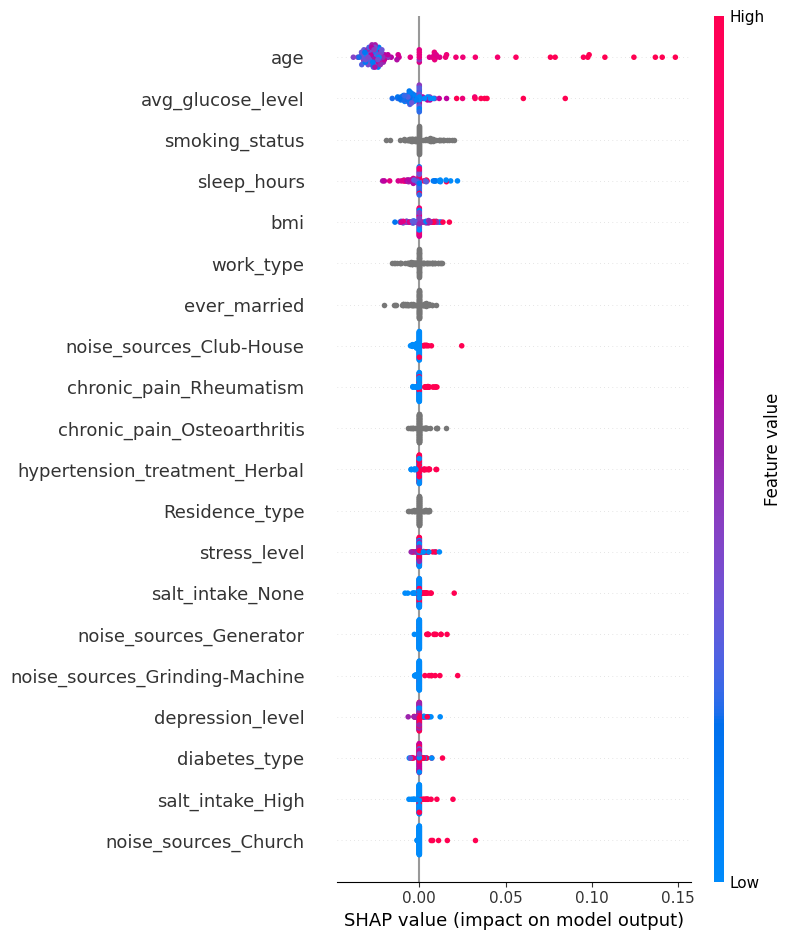

In [1]:
import shap
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv(r"C:/Users/sibs2/Downloads/brain_stroke_updated.csv")

# Define columns
target = 'stroke'

numeric_features = ['age', 'avg_glucose_level', 'bmi', 'stress_level',
                    'ptsd', 'depression_level', 'diabetes_type', 'sleep_hours']

categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type',
                        'smoking_status', 'chronic_pain_None', 'chronic_pain_Osteoarthritis',
                        'chronic_pain_Others']

boolean_features = ['chronic_pain_Rheumatism', 'salt_intake_High', 'salt_intake_Little',
                    'salt_intake_Moderate', 'salt_intake_None',
                    'hypertension_treatment_Drugs', 'hypertension_treatment_Herbal',
                    'hypertension_treatment_None', 'nutritional_lifestyle_Fast Foods',
                    'nutritional_lifestyle_Homemade Food', 'nutritional_lifestyle_Junk Food',
                    'nutritional_lifestyle_Local Bukka/Street Food',
                    'noise_sources_Block-Industry', 'noise_sources_Church',
                    'noise_sources_Club-House', 'noise_sources_Generator',
                    'noise_sources_Grinding-Machine', 'noise_sources_Market',
                    'noise_sources_Mosque', 'noise_sources_None', 'noise_sources_Welder']

drop_features = ['pollution_level Air', 'pollution_level water', 'pollution_level enviromental']

# Drop unused features and handle NaNs in target
df_cleaned = df.drop(columns=drop_features)
df_cleaned = df_cleaned[df_cleaned[target].notna()]  # Remove rows with NaN in target
df_cleaned[target] = df_cleaned[target].astype(int)

# Split features and target
X = df_cleaned.drop(columns=target)
y = df_cleaned[target]

# Save feature names for later use
feature_names = X.columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('bool', 'passthrough', boolean_features)
])

# Create pipeline
stroke_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
stroke_pipeline.fit(X_train, y_train)

# Sample input for SHAP
sample_input = X_test.sample(100, random_state=1)

# Define model prediction function for SHAP
def model_predict(x):
    x_df = pd.DataFrame(x, columns=feature_names)
    return stroke_pipeline.predict_proba(x_df)[:, 1]

# Convert input to NumPy
sample_numpy = sample_input.values
background_data = shap.sample(X_train, 100, random_state=42)
background_numpy = background_data.values

# Initialize SHAP KernelExplainer
explainer = shap.KernelExplainer(model_predict, background_numpy)
shap_values = explainer.shap_values(sample_numpy)

# Plot SHAP summary
shap.summary_plot(shap_values, sample_input)


In [2]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Define preprocessing
numeric_features = ['age', 'avg_glucose_level', 'bmi']
categorical_features = ['gender', 'work_type', 'Residence_type']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Define model
model = RandomForestClassifier()

# Combine into a pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# Fit pipeline on your data
model_pipeline.fit(X_train, y_train)

# Save pipeline
import joblib
joblib.dump(model_pipeline, 'stroke_model_pipeline.pkl')


['stroke_model_pipeline.pkl']

<Figure size 640x480 with 0 Axes>

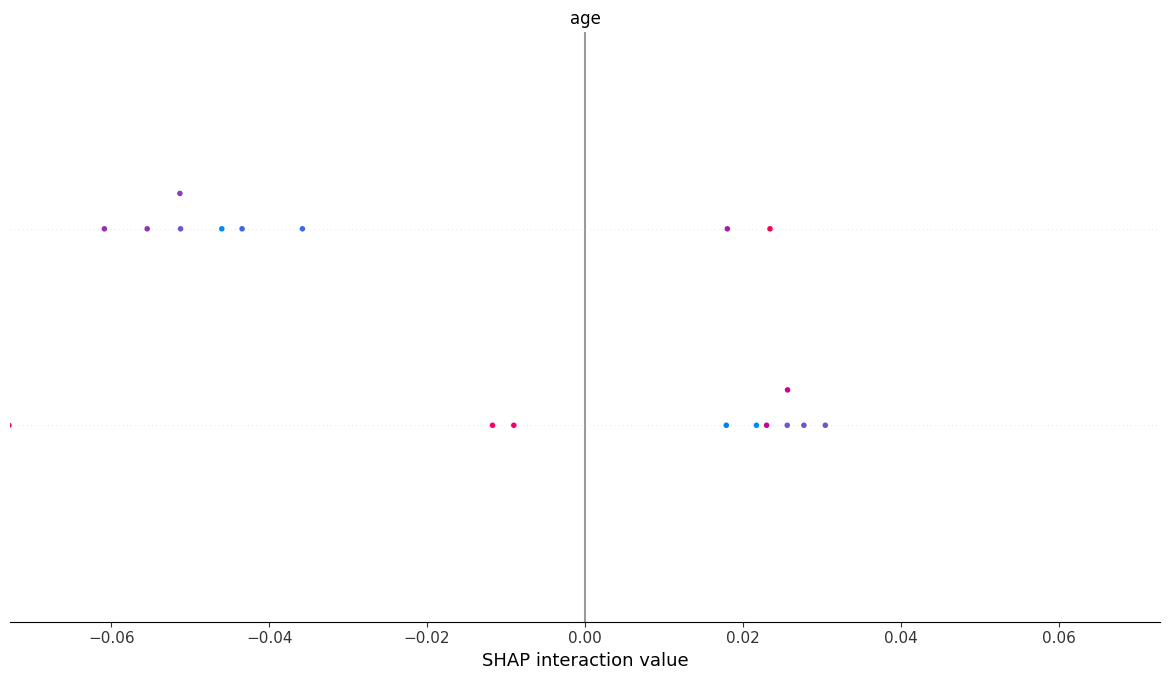

In [3]:
import pandas as pd
import shap
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# === Load your dataset here ===
df = pd.read_csv(r"C:/Users/sibs2/Downloads/brain_stroke_updated.csv")

target = 'stroke'

numeric_features = ['age', 'avg_glucose_level', 'bmi', 'stress_level',
                    'ptsd', 'depression_level', 'diabetes_type', 'sleep_hours']

categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type',
                        'smoking_status', 'chronic_pain_None', 'chronic_pain_Osteoarthritis',
                        'chronic_pain_Others']

boolean_features = ['chronic_pain_Rheumatism', 'salt_intake_High', 'salt_intake_Little',
                    'salt_intake_Moderate', 'salt_intake_None',
                    'hypertension_treatment_Drugs', 'hypertension_treatment_Herbal',
                    'hypertension_treatment_None', 'nutritional_lifestyle_Fast Foods',
                    'nutritional_lifestyle_Homemade Food', 'nutritional_lifestyle_Junk Food',
                    'nutritional_lifestyle_Local Bukka/Street Food',
                    'noise_sources_Block-Industry', 'noise_sources_Church',
                    'noise_sources_Club-House', 'noise_sources_Generator',
                    'noise_sources_Grinding-Machine', 'noise_sources_Market',
                    'noise_sources_Mosque', 'noise_sources_None', 'noise_sources_Welder']

drop_features = ['pollution_level Air', 'pollution_level water', 'pollution_level enviromental']

# Drop unused columns and clean target
df_cleaned = df.drop(columns=drop_features)
df_cleaned = df_cleaned[df_cleaned[target].notna()]
df_cleaned[target] = df_cleaned[target].astype(int)

X = df_cleaned.drop(columns=target)
y = df_cleaned[target]

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('bool', 'passthrough', boolean_features)
])

# Full pipeline with classifier
stroke_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train model
stroke_pipeline.fit(X_train, y_train)

# Select samples to explain
sample_input = X_test.iloc[:10]

# Get transformed sample input
sample_input_transformed = stroke_pipeline.named_steps['preprocessor'].transform(sample_input)

# SHAP explainer for tree model
explainer = shap.TreeExplainer(stroke_pipeline.named_steps['classifier'])

# Calculate SHAP values
shap_values = explainer.shap_values(sample_input_transformed)

# Get transformed feature names
num_features = numeric_features
cat_features = stroke_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
bool_features = boolean_features

feature_names_transformed = list(num_features) + list(cat_features) + list(bool_features)

# Plot SHAP summary with correct feature names
shap.summary_plot(shap_values, sample_input_transformed, feature_names=feature_names_transformed)


In [4]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

grid_search = GridSearchCV(stroke_pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}


In [5]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97       943
           1       0.00      0.00      0.00        54

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.89      0.95      0.92       997

ROC AUC Score: 0.8300341699069165


C:\Users\sibs2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sibs2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sibs2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

In [6]:
import joblib
joblib.dump(stroke_pipeline, 'stroke_model_pipeline.pkl')

['stroke_model_pipeline.pkl']

In [7]:
import joblib

# Save the model
joblib.dump(stroke_pipeline, 'stroke_model_pipeline.joblib')

['stroke_model_pipeline.joblib']

In [9]:
import joblib
import cloudpickle

# Load your old model
stroke_model = joblib.load("stroke_model_pipeline.pkl")

# Save with cloudpickle
with open("stroke_model_pipeline_cp.pkl", "wb") as f:
    cloudpickle.dump(stroke_model, f)


In [11]:
import streamlit as st
import cloudpickle
import os

# ======================
# MODEL LOADING HELPERS
# ======================
def load_model(filename):
    with open(filename, "rb") as f:
        return cloudpickle.load(f)

# ======================
# LOAD MODELS
# ======================
try:
    stroke_model = load_model("C:\\Users\\sibs2\\african-neurohealth-dashboard\\stroke_model.pkl")
except FileNotFoundError as e:
    st.error(f"Model file not found: {e.filename}. Please retrain and save using cloudpickle.")
    st.stop()
except Exception as e:
    st.error(f"Error loading models: {str(e)}")
    st.stop()


2025-08-16 10:53:56.355 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-16 10:53:58.179 
  command:

    streamlit run C:\Users\sibs2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-08-16 10:53:58.179 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-16 10:53:58.182 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-16 10:53:58.183 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [12]:
# convert_old_model.py
import joblib
import cloudpickle

# Path to your old model
old_model_path = "stroke_model_pipeline.pkl"

# Path to save the new version-compatible model
new_model_path = "stroke_model_pipeline_cloud.pkl"

# Step 1: Load old model using joblib (in old scikit-learn environment if needed)
try:
    model = joblib.load(old_model_path)
except AttributeError as e:
    print("Old version dependency detected:", e)
    print("Make sure to load in the original scikit-learn version first.")
    raise

# Step 2: Save using cloudpickle for version-independent usage
with open(new_model_path, "wb") as f:
    cloudpickle.dump(model, f)

print(f"Model saved as {new_model_path}")

# Step 3: Load in any new environment
# import cloudpickle
# with open(new_model_path, "rb") as f:
#     model = cloudpickle.load(f)


Model saved as stroke_model_pipeline_cloud.pkl


In [7]:
import cloudpickle
import streamlit as st

@st.cache_resource
def load_model(path):
    with open(path, "rb") as f:
        return cloudpickle.load(f)

# Load your converted model
stroke_model = load_model("stroke_model_pipeline_v1.7.pkl")

st.write("✅ Model loaded successfully!")


2025-08-16 00:39:45.313 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-16 00:39:46.508 
  command:

    streamlit run C:\Users\sibs2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-08-16 00:39:46.510 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-16 00:39:46.513 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-16 00:39:46.519 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-16 00:39:46.577 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-16 00:39:46.578 Thread 'MainThread': missing ScriptRunContext! This w

In [1]:
import pickle
import os
import joblib
import cloudpickle

with open(r"C:\Users\sibs2\african-neurohealth-dashboard\stroke_model_pipeline_v1.7.pkl", "rb") as f:
    while True:
        try:
            obj = pickle.load(f)
            if hasattr(obj, 'sklearn_version'):
                print("Model was saved with scikit-learn version:", obj.sklearn_version)
                break
        except EOFError:
            break
        except Exception:
            break

In [13]:
import joblib, cloudpickle

# Load with old sklearn
model = joblib.load(r"C:\Users\sibs2\african-neurohealth-dashboard\stroke_model_pipeline.pkl")

# Save in a forward-compatible format
with open(r"C:\Users\sibs2\african-neurohealth-dashboard\stroke_model_portable.pkl", "wb") as f:
    cloudpickle.dump(model, f)
with open("C:\\Users\\sibs2\\african-neurohealth-dashboard\\stroke_model.pkl", "wb") as f:
    cloudpickle.dump(stroke_model, f)


Accuracy: 0.9458375125376128
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       943
           1       0.00      0.00      0.00        54

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.89      0.95      0.92       997



C:\Users\sibs2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sibs2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sibs2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

<Figure size 640x480 with 0 Axes>

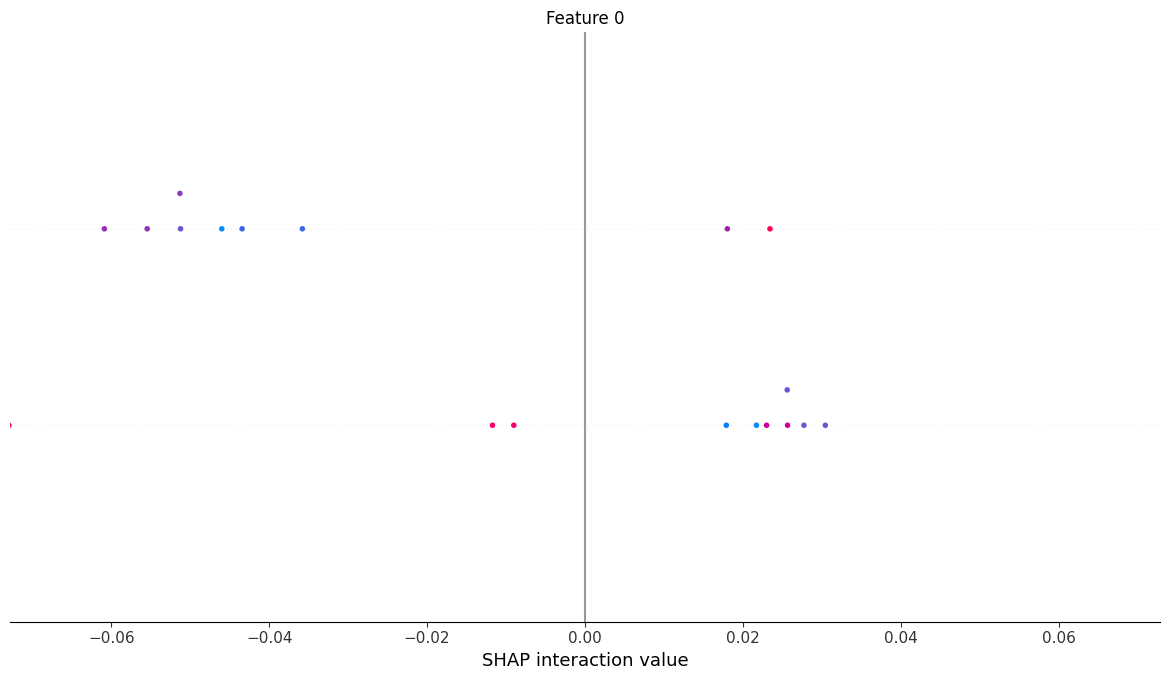

['shap_tree_explainer.joblib']

In [6]:
import pandas as pd
import shap
import joblib
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv(r"C:/Users/sibs2/Downloads/brain_stroke_updated.csv")

# Define columns
target = 'stroke'

numeric_features = [
    'age', 'avg_glucose_level', 'bmi', 'stress_level',
    'ptsd', 'depression_level', 'diabetes_type', 'sleep_hours'
]

categorical_features = [
    'gender', 'ever_married', 'work_type', 'Residence_type',
    'smoking_status', 'chronic_pain_None', 'chronic_pain_Osteoarthritis',
    'chronic_pain_Others'
]

boolean_features = [
    'chronic_pain_Rheumatism', 'salt_intake_High', 'salt_intake_Little',
    'salt_intake_Moderate', 'salt_intake_None',
    'hypertension_treatment_Drugs', 'hypertension_treatment_Herbal',
    'hypertension_treatment_None', 'nutritional_lifestyle_Fast Foods',
    'nutritional_lifestyle_Homemade Food', 'nutritional_lifestyle_Junk Food',
    'nutritional_lifestyle_Local Bukka/Street Food',
    'noise_sources_Block-Industry', 'noise_sources_Church',
    'noise_sources_Club-House', 'noise_sources_Generator',
    'noise_sources_Grinding-Machine', 'noise_sources_Market',
    'noise_sources_Mosque', 'noise_sources_None', 'noise_sources_Welder'
]

drop_features = [
    'pollution_level Air', 'pollution_level water', 'pollution_level enviromental'
]

# Clean dataset
df_cleaned = df.drop(columns=drop_features)
df_cleaned = df_cleaned[df_cleaned[target].notna()]
df_cleaned[target] = df_cleaned[target].astype(int)

# Split features and target
X = df_cleaned.drop(columns=target)
y = df_cleaned[target]

# Save feature names
feature_names = X.columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('bool', 'passthrough', boolean_features)
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Preprocess the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# 2. Train your model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_preprocessed, y_train)

# 3. Evaluate
y_pred = model.predict(X_test_preprocessed)
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_preprocessed, y_train)

# Create a pipeline: preprocessing + model
clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(random_state=42))
])

# Fit the pipeline on training data
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# For probabilities if needed
y_proba = clf.predict_proba(X_test)

# Create pipeline
stroke_pipeline = Pipeline([
    ("preprocessor", preprocessor),          # your ColumnTransformer
    ("model", RandomForestClassifier(random_state=42))
])

# Fit pipeline on training data (raw X_train)
stroke_pipeline.fit(X_train, y_train)

# Optional: evaluate
y_pred = stroke_pipeline.predict(X_test)

stroke_pipeline = Pipeline([
    ("preprocessor", preprocessor),  # your ColumnTransformer
    ("model", RandomForestClassifier(random_state=42))
])

# Fit pipeline on training data
stroke_pipeline.fit(X_train, y_train)

# ✅ Save preprocessor and model
joblib.dump(preprocessor, "stroke_preprocessor.joblib")
joblib.dump(model, "stroke_model.joblib")
joblib.dump(model, "stroke_preprocessor.joblib")
joblib.dump(stroke_pipeline, "stroke_pipeline.joblib")



# ✅ SHAP TreeExplainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_preprocessed[:10])

# Plot SHAP summary
shap.summary_plot(shap_values, X_test_preprocessed[:10])

# ✅ Optional: Save explainer (TreeExplainer is serializable)
joblib.dump(explainer, "shap_tree_explainer.joblib")

In [14]:
import sklearn
print(sklearn.__version__)

import joblib

clf_path = r"C:\Users\sibs2\african-neurohealth-dashboard\stroke_pipeline.joblib"

import joblib

clf_path = r"C:\Users\sibs2\african-neurohealth-dashboard\stroke_pipeline.joblib"

# Check if the model is loaded correctly
if clf:
    print("Model loaded successfully.")
else:
    print("Failed to load model.")


1.6.1
Model loaded successfully.


<Figure size 640x480 with 0 Axes>

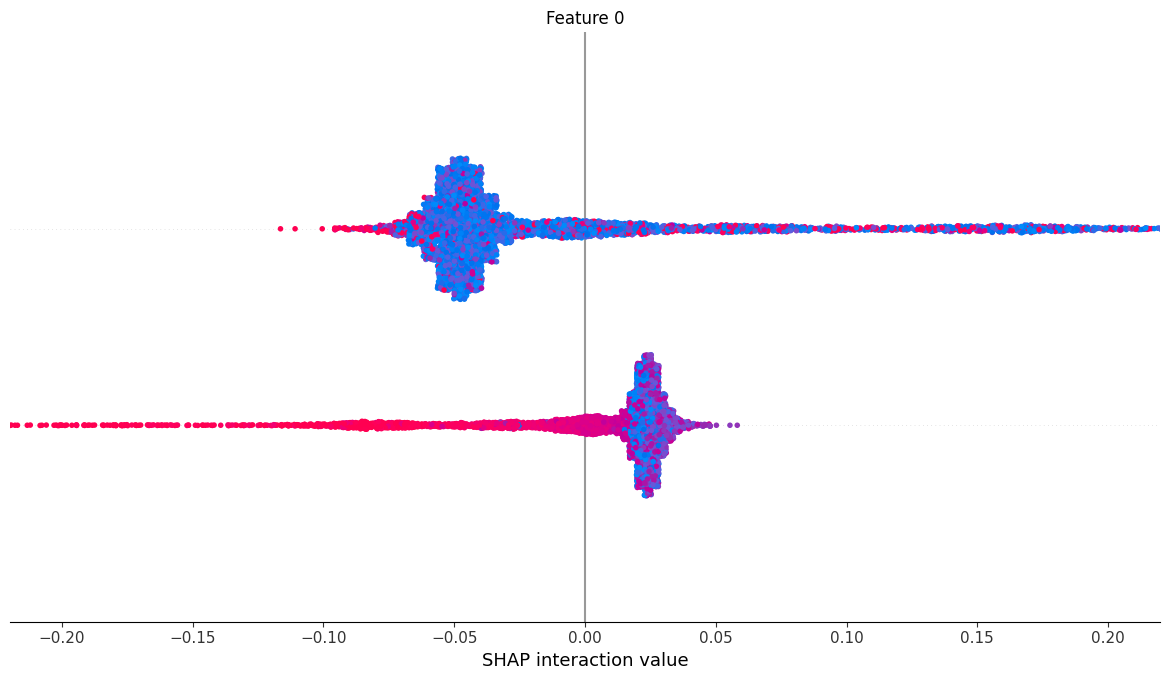

In [5]:
# Reload everything
preprocessor = joblib.load("stroke_preprocessor.joblib")
model = joblib.load("stroke_model.joblib")
explainer = joblib.load("shap_tree_explainer.joblib")

# Transform new data
new_data = pd.read_csv(r"C:/Users/sibs2/Downloads/brain_stroke_updated.csv")
new_preprocessed = preprocessor.transform(new_data)

# Explain predictions
shap_values = explainer.shap_values(new_preprocessed)
shap.summary_plot(shap_values, new_preprocessed)

In [16]:
import streamlit as st
import pandas as pd
import joblib

# ✅ Load the trained pipeline
stroke_model = joblib.load("stroke_new_model_pipeline.pkl")

st.write("✅ Stroke model pipeline loaded successfully!")

2025-08-16 21:59:00.475 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-16 21:59:00.481 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-16 21:59:00.481 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
